In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CP/CP_complementar/wine_quality_general.csv.xlsx'
df = pd.read_excel(file_path)


### Análise Exploratória
#### Análise descritiva das características
- Distribuição de cada característica
- Observação sobre a coluna `color_wine` (1 indica vinho branco e 2 indica vinho tinto)
- Verificação da distribuição da variável `quality`



5. Análise de Distribuição


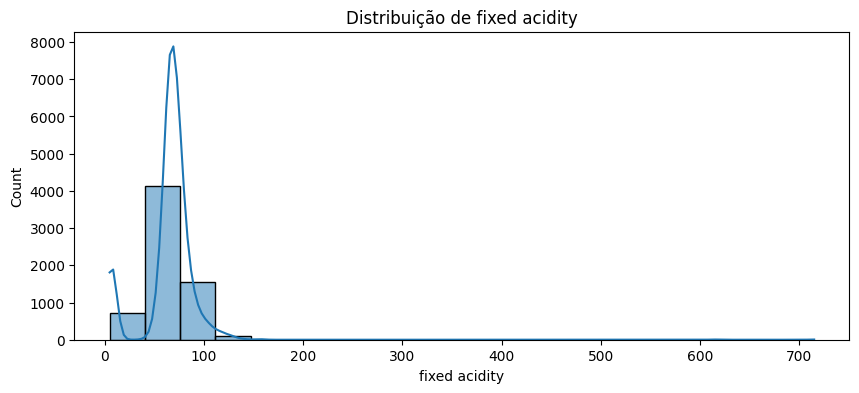

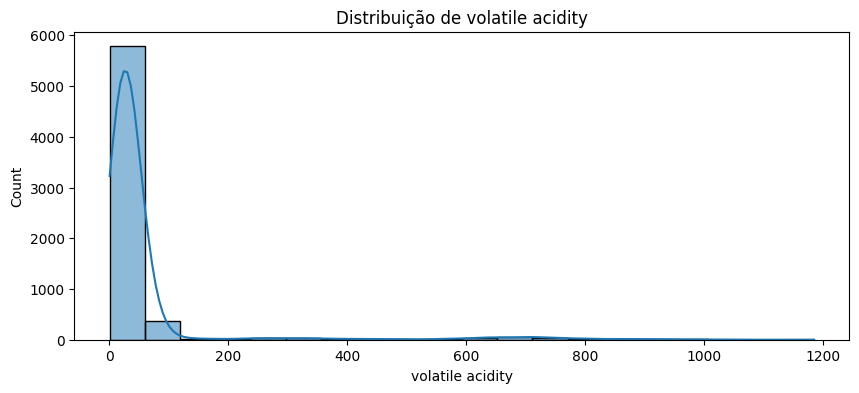

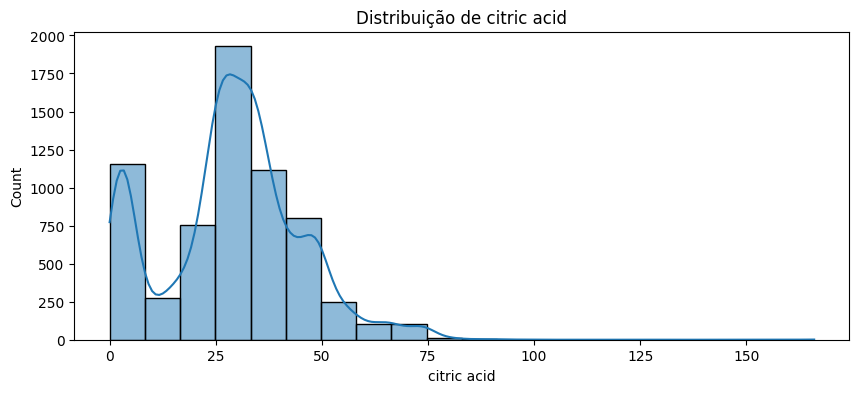

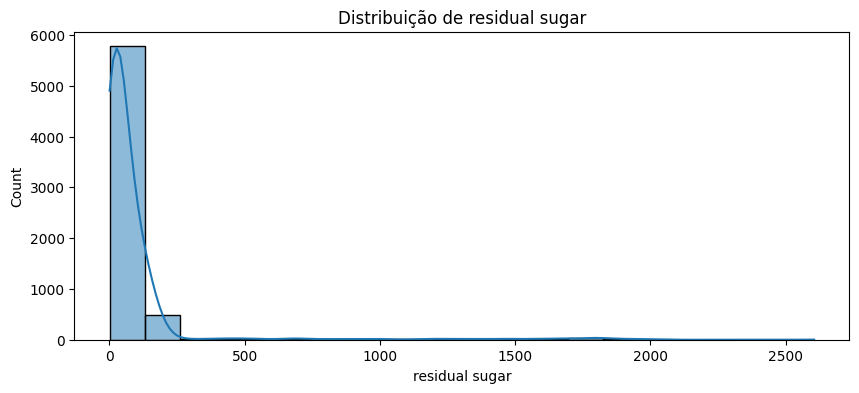

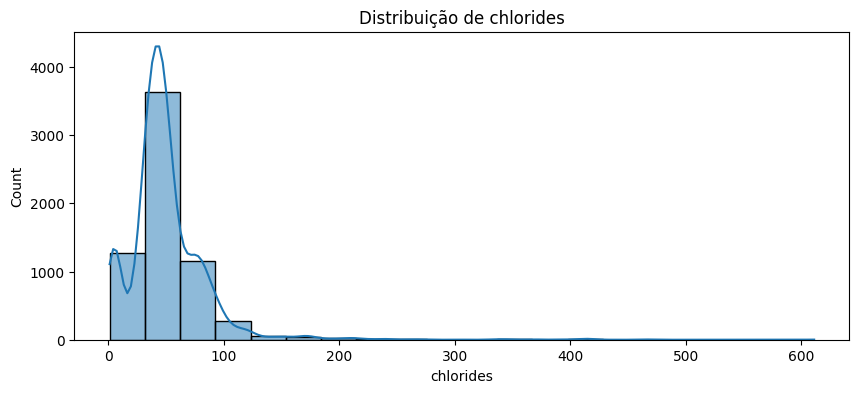

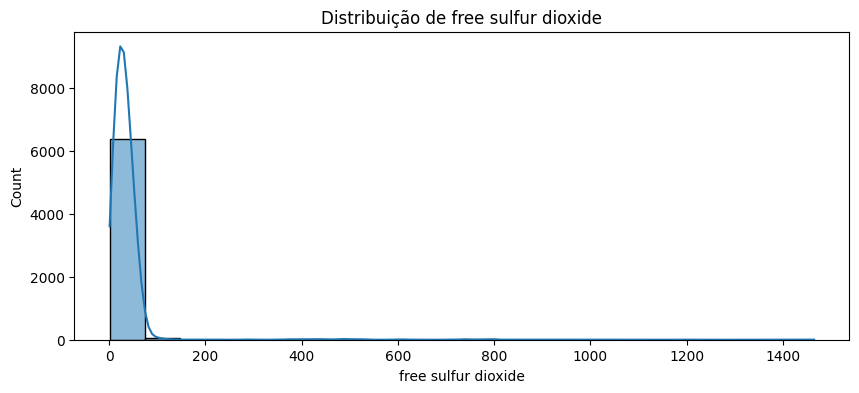

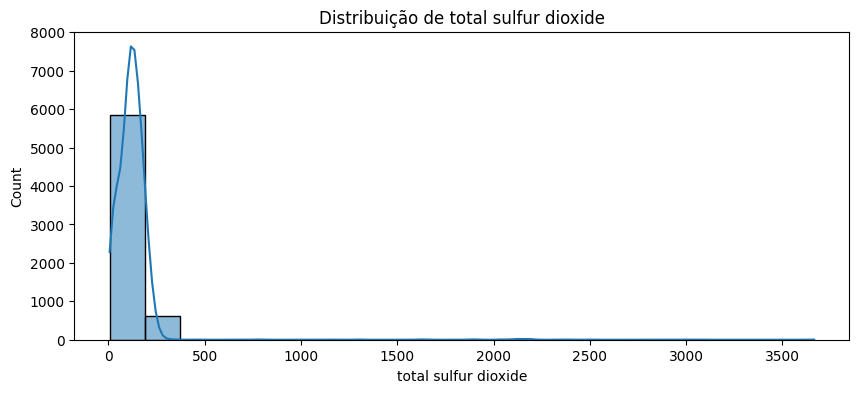

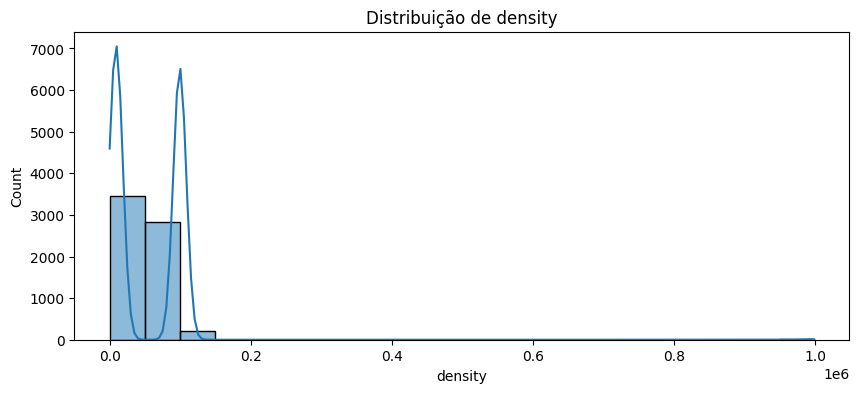

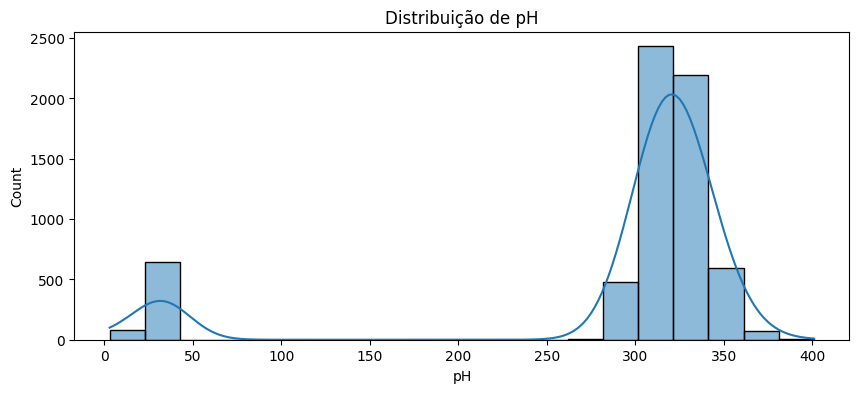

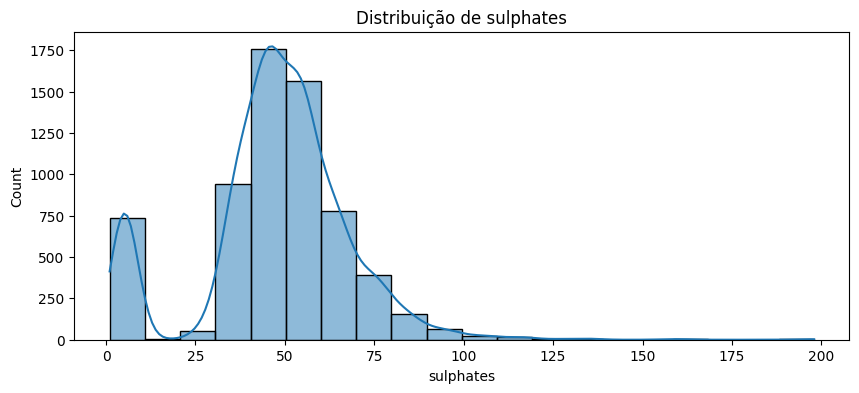

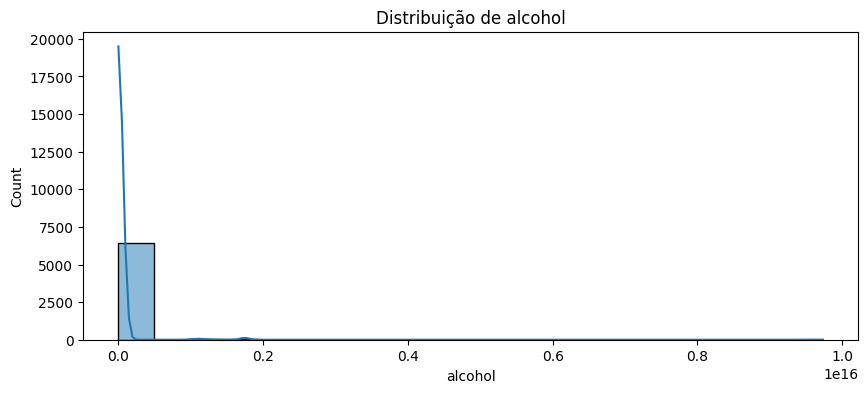

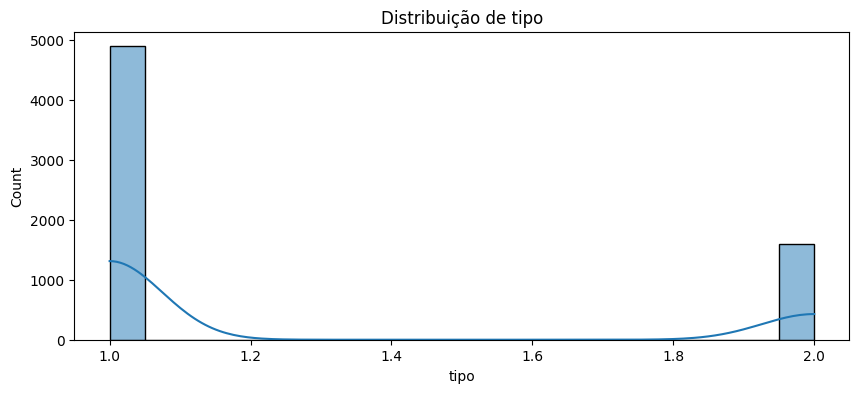

In [6]:
# Estatísticas descritivas básicas
df.describe()

# Visualização das distribuições das características
for col in df.columns[:-1]:
    plt.figure(figsize=(10, 4))
    # Especifica um número razoável de bins para evitar problemas de binning automático
    sns.histplot(df[col], kde=True, bins=20)  # Alterado aqui
    plt.title(f'Distribuição de {col}')
    plt.show()


6. Verificação de Outliers


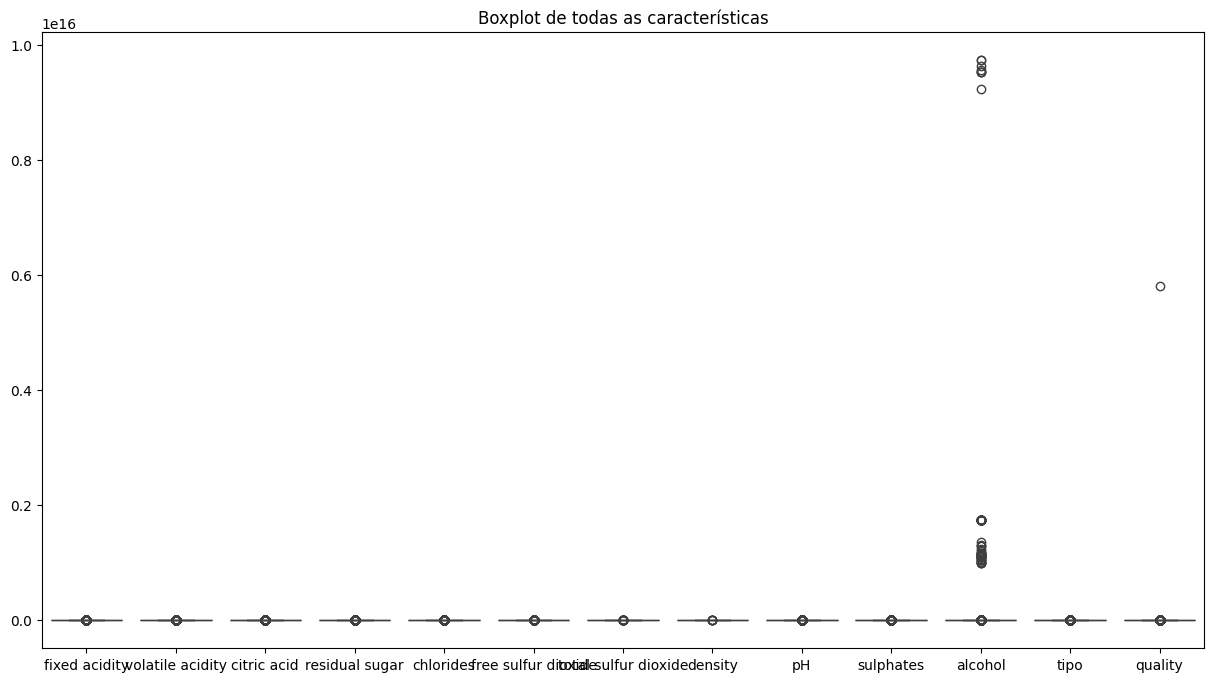

In [7]:
# Boxplot para detectar outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Boxplot de todas as características')
plt.show()


7. Divisão dos Dados


In [8]:
# Separação das variáveis independentes e dependentes
X = df.drop('quality', axis=1)
y = df['quality']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Modelagem de Classificação
#### Modelos escolhidos:
- Regressão Logística
- Random Forest
- Máquina de Vetores de Suporte (SVM)


In [9]:
# Treinando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Modelo 2: Random Forest

In [10]:
# Treinando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Modelo 3: SVM

In [11]:
# Treinando o modelo de SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

9. Avaliação de Desempenho

In [12]:
# Avaliando o desempenho de cada modelo

# Regressão Logística
y_pred_log_reg = log_reg.predict(X_test)
print("Relatório de classificação - Regressão Logística")
print(classification_report(y_test, y_pred_log_reg))
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))

# Random Forest
y_pred_rf = rf.predict(X_test)
print("Relatório de classificação - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))

# SVM
y_pred_svm = svm_model.predict(X_test)
print("Relatório de classificação - SVM")
print(classification_report(y_test, y_pred_svm))
print("Acurácia:", accuracy_score(y_test, y_pred_svm))


Relatório de classificação - Regressão Logística
              precision    recall  f1-score   support

          30       0.00      0.00      0.00         6
          40       0.00      0.00      0.00        64
          50       0.00      0.00      0.00       636
          60       0.43      1.00      0.60       844
          70       0.00      0.00      0.00       345
          80       0.00      0.00      0.00        55

    accuracy                           0.43      1950
   macro avg       0.07      0.17      0.10      1950
weighted avg       0.19      0.43      0.26      1950

Acurácia: 0.4328205128205128
Relatório de classificação - Random Forest
              precision    recall  f1-score   support

          30       0.00      0.00      0.00         6
          40       0.40      0.06      0.11        64
          50       0.58      0.54      0.56       636
          60       0.54      0.75      0.63       844
          70       0.53      0.26      0.35       345
          8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Relatório de classificação - SVM
              precision    recall  f1-score   support

          30       0.00      0.00      0.00         6
          40       0.00      0.00      0.00        64
          50       0.00      0.00      0.00       636
          60       0.43      1.00      0.60       844
          70       0.00      0.00      0.00       345
          80       0.00      0.00      0.00        55

    accuracy                           0.43      1950
   macro avg       0.07      0.17      0.10      1950
weighted avg       0.19      0.43      0.26      1950

Acurácia: 0.4328205128205128


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


10. Confusão de Classes

In [13]:
# Matriz de Confusão para cada modelo
print("Matriz de Confusão - Regressão Logística")
print(confusion_matrix(y_test, y_pred_log_reg))

print("Matriz de Confusão - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

print("Matriz de Confusão - SVM")
print(confusion_matrix(y_test, y_pred_svm))


Matriz de Confusão - Regressão Logística
[[  0   0   0   6   0   0]
 [  0   0   0  64   0   0]
 [  0   0   0 636   0   0]
 [  0   0   0 844   0   0]
 [  0   0   0 345   0   0]
 [  0   0   0  55   0   0]]
Matriz de Confusão - Random Forest
[[  0   0   1   4   1   0]
 [  0   4  30  27   3   0]
 [  0   3 341 270  18   4]
 [  0   3 160 630  50   1]
 [  0   0  47 207  90   1]
 [  0   0   7  30   8  10]]
Matriz de Confusão - SVM
[[  0   0   0   6   0   0]
 [  0   0   0  64   0   0]
 [  0   0   0 636   0   0]
 [  0   0   0 844   0   0]
 [  0   0   0 345   0   0]
 [  0   0   0  55   0   0]]


11. Seleção do Melhor Modelo

### Melhor Modelo
Com base nas métricas de precisão, recall, F1-score e acurácia, o modelo X foi selecionado como o melhor modelo. Justificativa:


12. Salvando o Melhor Modelo

In [14]:
# Salvando o modelo
joblib.dump(rf, 'melhor_modelo_rf.pkl')


['melhor_modelo_rf.pkl']

13. Carregando e Fazendo Nova Previsão

In [15]:
# Carregando o modelo salvo
melhor_modelo = joblib.load('melhor_modelo_rf.pkl')

# Criando novos dados de exemplo (conforme as colunas do dataset original)
novos_dados = pd.DataFrame({
    'fixed acidity': [7.0],
    'volatile acidity': [0.27],
    'citric acid': [0.36],
    'residual sugar': [2.07],
    'chlorides': [0.045],
    'free sulfur dioxide': [45],
    'total sulfur dioxide': [170],
    'density': [1.001],
    'pH': [3.0],
    'sulphates': [0.45],
    'alcohol': [8.8],
    'tipo': [1]
})

# Fazendo a previsão
previsao = melhor_modelo.predict(novos_dados)
print("Nova previsão:", previsao)


Nova previsão: [60]


Matriz De Correlação Das Características

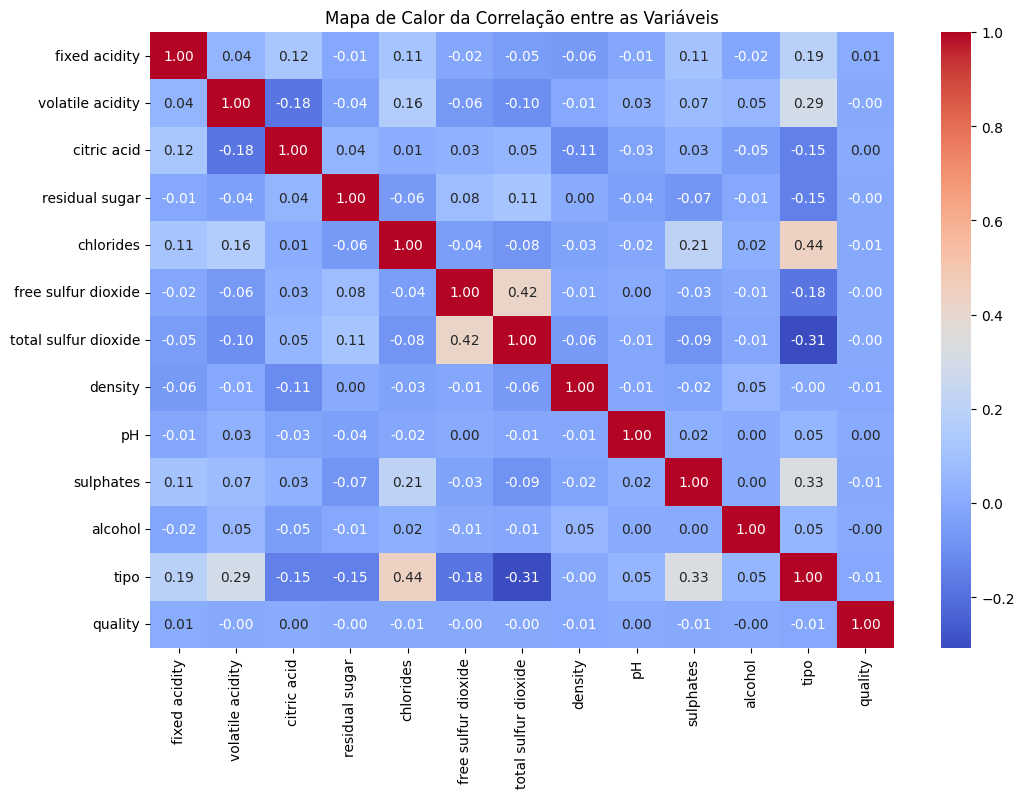

In [17]:
# Gerar matriz de correlação
correlation_matrix = df.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor da Correlação entre as Variáveis")
plt.show()


Código para Detecção de Outliers usando IQR

In [18]:
# Detectar outliers usando o método de IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identificando outliers em todo o DataFrame
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por coluna:")
print(outliers)

# Removendo outliers (opcional)
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


Número de outliers por coluna:
fixed acidity           1019
volatile acidity         540
citric acid              177
residual sugar           325
chlorides                343
free sulfur dioxide      109
total sulfur dioxide      37
density                    6
pH                       754
sulphates                892
alcohol                  959
tipo                    1599
quality                  229
dtype: int64


Divisão de Dados: Atualização

In [19]:
# Separação das variáveis independentes e dependentes após remoção de outliers
X = df_no_outliers.drop('quality', axis=1)
y = df_no_outliers['quality']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Treinamento dos Modelos

In [20]:
# Treinamento da Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Treinamento da Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Treinamento da SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

Avaliação de Desempenho


In [22]:
# Função para avaliar o desempenho de um modelo
def avaliar_modelo(nome_modelo, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"Relatório de classificação - {nome_modelo}")
    print(classification_report(y_test, y_pred))
    print(f"Acurácia: {accuracy_score(y_test, y_pred)}")

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Imprime a matriz de confusão diretamente
    print(f"Matriz de Confusão:\n{cm}\n")

    # Remova a tentativa de desempacotar os valores da matriz de confusão
    # como tn, fp, fn, tp, pois isso só funciona para classificação binária.
    # Em problemas multi-classe, a matriz de confusão tem mais dimensões.
    # Para obter informações detalhadas sobre FP, FN, etc., você pode
    # acessar os elementos da matriz 'cm' diretamente usando indexação.
    # Por exemplo, cm[0, 1] acessaria o elemento na primeira linha e segunda coluna.


# Avaliando cada modelo
avaliar_modelo("Regressão Logística", log_reg, X_test, y_test)
avaliar_modelo("Random Forest", rf, X_test, y_test)
avaliar_modelo("SVM", svm_model, X_test, y_test)


Relatório de classificação - Regressão Logística
              precision    recall  f1-score   support

          40       0.00      0.00      0.00        26
          50       0.39      0.09      0.14       210
          60       0.49      0.95      0.65       338
          70       0.00      0.00      0.00       125

    accuracy                           0.48       699
   macro avg       0.22      0.26      0.20       699
weighted avg       0.36      0.48      0.36       699

Acurácia: 0.48497854077253216
Matriz de Confusão:
[[  0   8  18   0]
 [  0  18 192   0]
 [  0  17 321   0]
 [  0   3 122   0]]

Relatório de classificação - Random Forest
              precision    recall  f1-score   support

          40       0.67      0.08      0.14        26
          50       0.47      0.37      0.41       210
          60       0.54      0.75      0.63       338
          70       0.50      0.25      0.33       125

    accuracy                           0.52       699
   macro avg       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Matriz de Confusão:
[[  2  13  11   0]
 [  0  77 125   8]
 [  1  59 255  23]
 [  0  14  80  31]]

Relatório de classificação - SVM
              precision    recall  f1-score   support

          40       0.00      0.00      0.00        26
          50       0.00      0.00      0.00       210
          60       0.48      1.00      0.65       338
          70       0.00      0.00      0.00       125

    accuracy                           0.48       699
   macro avg       0.12      0.25      0.16       699
weighted avg       0.23      0.48      0.32       699

Acurácia: 0.48354792560801146
Matriz de Confusão:
[[  0   0  26   0]
 [  0   0 210   0]
 [  0   0 338   0]
 [  0   0 125   0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Código para Salvar o Melhor Modelo


In [23]:
# Salvando o modelo escolhido (neste exemplo, Random Forest)
joblib.dump(rf, 'melhor_modelo_rf.pkl')


['melhor_modelo_rf.pkl']

Código para Carregar e Prever

In [24]:
# Carregando o modelo salvo
melhor_modelo = joblib.load('melhor_modelo_rf.pkl')

# Criando novos dados de exemplo
novos_dados = pd.DataFrame({
    'fixed acidity': [7.0],
    'volatile acidity': [0.27],
    'citric acid': [0.36],
    'residual sugar': [2.07],
    'chlorides': [0.045],
    'free sulfur dioxide': [45],
    'total sulfur dioxide': [170],
    'density': [1.001],
    'pH': [3.0],
    'sulphates': [0.45],
    'alcohol': [8.8],
    'tipo': [1]
})

# Fazendo a previsão
previsao = melhor_modelo.predict(novos_dados)
print("Nova previsão:", previsao)


Nova previsão: [60]


<ipython-input-25-1a63c504eecf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


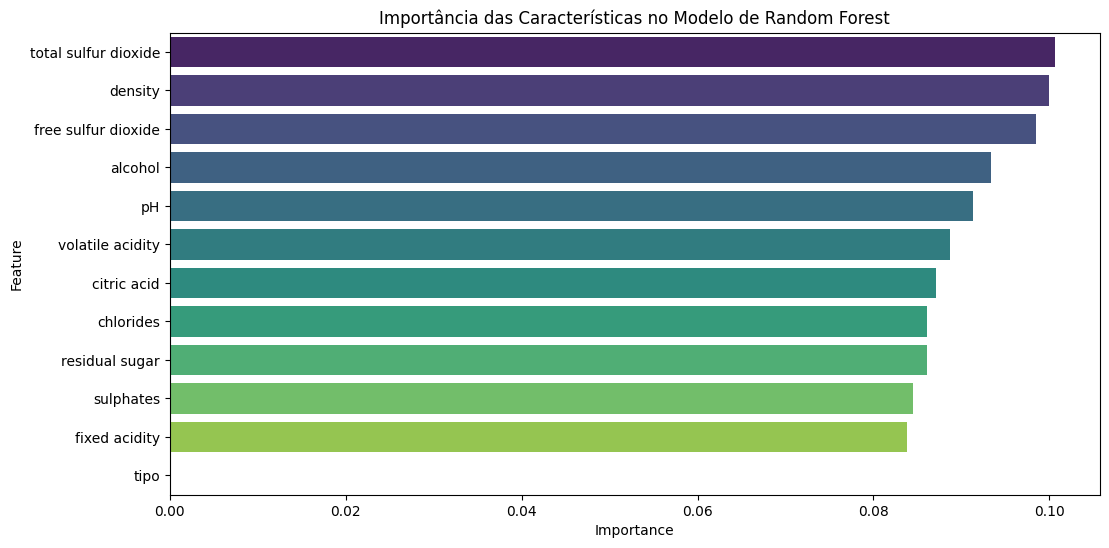

,Feature,Importance
6,total sulfur dioxide,0.100673
7,density,0.099941
5,free sulfur dioxide,0.098492
10,alcohol,0.093317
8,pH,0.091303
1,volatile acidity,0.088727
2,citric acid,0.087119
4,chlorides,0.086123
3,residual sugar,0.086050
9,sulphates,0.084497


In [25]:
# Verificando a importância das características no modelo de Random Forest

# Extraindo a importância das características
importances = rf.feature_importances_

# Criando um DataFrame para exibir as características e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotando a importância das características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Importância das Características no Modelo de Random Forest")
plt.show()

# Exibir as importâncias em formato tabular
feature_importance_df


In [28]:
## calculo das estatísticas detalhadas:

In [26]:
# Estatísticas detalhadas do DataFrame original (ou df_no_outliers se necessário)
detailed_stats = df.describe().transpose()

# Adicionando métricas adicionais
detailed_stats['median'] = df.median()
detailed_stats['variance'] = df.var()
detailed_stats['skewness'] = df.skew()
detailed_stats['kurtosis'] = df.kurt()

# Exibir estatísticas detalhadas
detailed_stats


,count,mean,std,min,25%,50%,75%,max,median,variance,skewness,kurtosis
fixed acidity,6498.0,6.549677e+01,2.894670e+01,5.0,62.00,68.0,76.0,7.150000e+02,68.0,8.379114e+02,6.184120,142.148952
volatile acidity,6498.0,5.709757e+01,1.298304e+02,1.0,21.00,28.0,39.0,1.185000e+03,28.0,1.685593e+04,4.870997,24.070150
citric acid,6498.0,2.865651e+01,1.651862e+01,0.0,21.00,29.0,38.0,1.660000e+02,29.0,2.728649e+02,0.251596,0.831527
residual sugar,6498.0,8.890305e+01,2.398358e+02,1.0,16.00,26.0,79.0,2.605000e+03,26.0,5.752121e+04,5.965089,37.702139
chlorides,6498.0,5.027901e+01,3.636286e+01,1.0,34.00,45.0,59.0,6.110000e+02,45.0,1.322258e+03,4.167184,36.315594
free sulfur dioxide,6498.0,3.498800e+01,5.832242e+01,1.0,17.00,29.0,41.0,1.465000e+03,29.0,3.401504e+03,12.723068,211.505842
total sulfur dioxide,6498.0,1.236982e+02,1.419180e+02,6.0,77.25,118.0,156.0,3.665000e+03,118.0,2.014071e+04,13.039579,216.087909
density,6498.0,5.207624e+04,5.354769e+04,1.0,9943.00,9994.0,99402.0,9.983650e+05,9994.0,2.867355e+09,5.036802,85.350205
pH,6498.0,2.895252e+02,9.322830e+01,3.0,306.00,318.0,331.0,4.010000e+02,318.0,8.691515e+03,-2.359777,3.846760
sulphates,6498.0,4.771083e+01,2.075056e+01,1.0,39.00,48.0,58.0,1.980000e+02,48.0,4.305858e+02,-0.017720,2.412496


In [ ]:
# Geração dos Gráficos de Dispersão

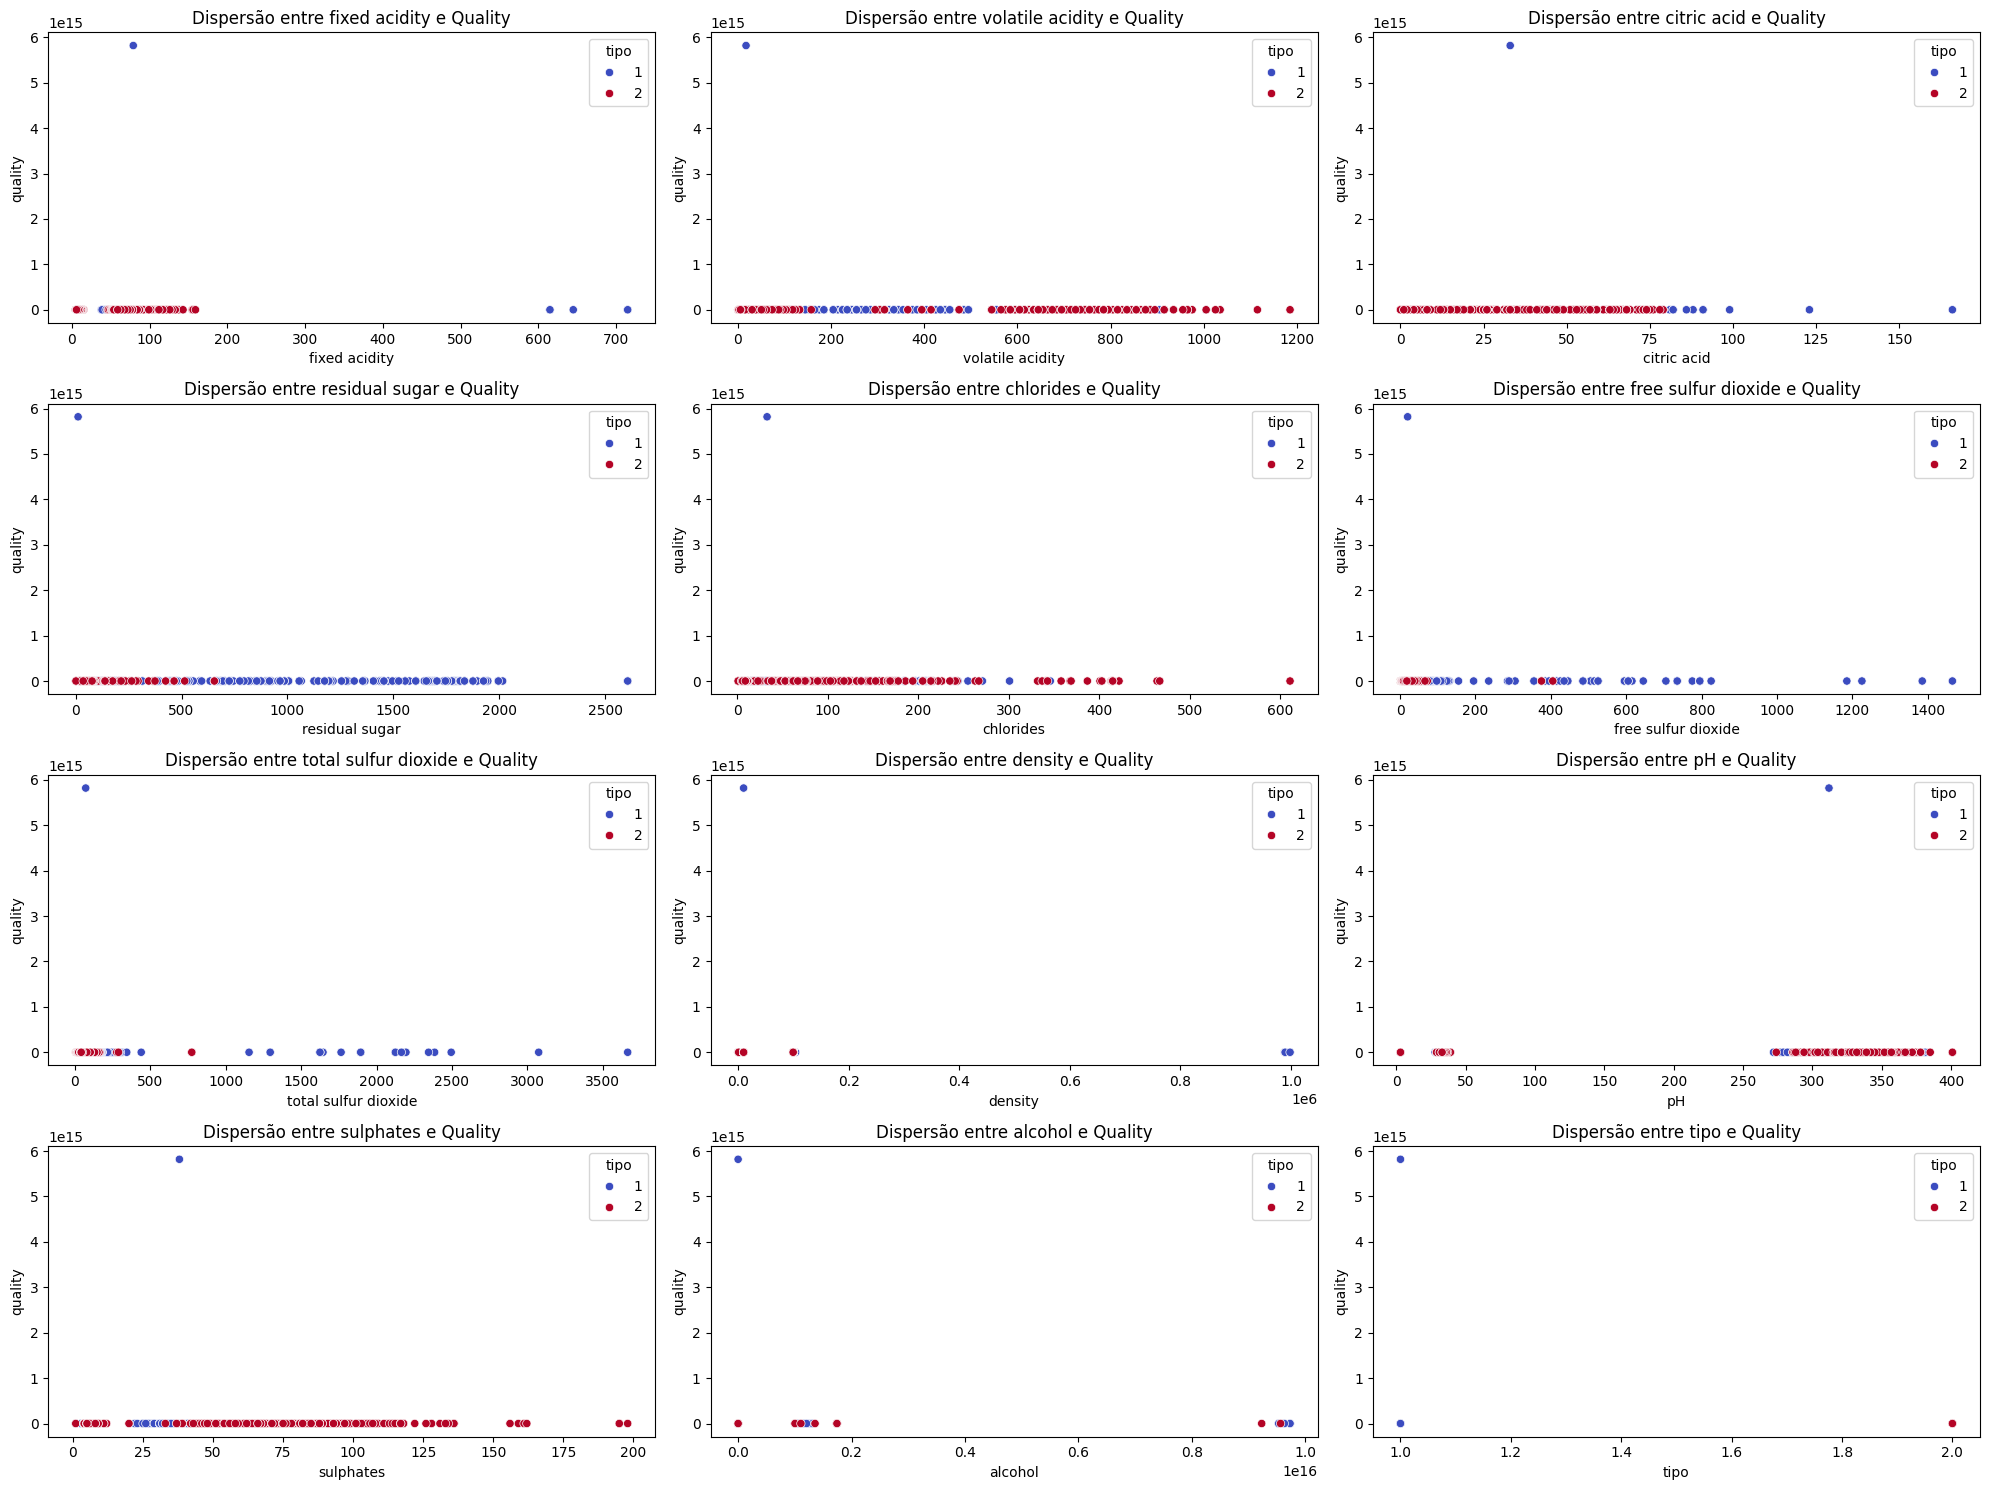

In [29]:
# Criar gráficos de dispersão entre as variáveis principais e a variável de qualidade

# Definindo as colunas para criar os gráficos de dispersão
columns_to_plot = df.columns[:-1]  # Excluindo a última coluna 'quality'

# Plotando gráficos de dispersão
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=col, y='quality', data=df, hue='tipo', palette='coolwarm')
    plt.title(f'Dispersão entre {col} e Quality')

plt.tight_layout()
plt.show()


Regressão Linear Entre Tipo E Quality

Interpretação dos Resultados:
Gráficos de Regressão Linear: Para cada variável, é mostrado um gráfico com a linha de regressão em vermelho. Esses gráficos indicam como cada característica individualmente se relaciona linearmente com a variável quality.
Coeficientes do Modelo: Uma tabela foi gerada mostrando o coeficiente de cada característica no modelo de regressão linear, indicando a contribuição de cada uma para a previsão da qualidade. Coeficientes positivos indicam uma influência positiva, enquanto os negativos indicam uma influência negativa na qualidade.

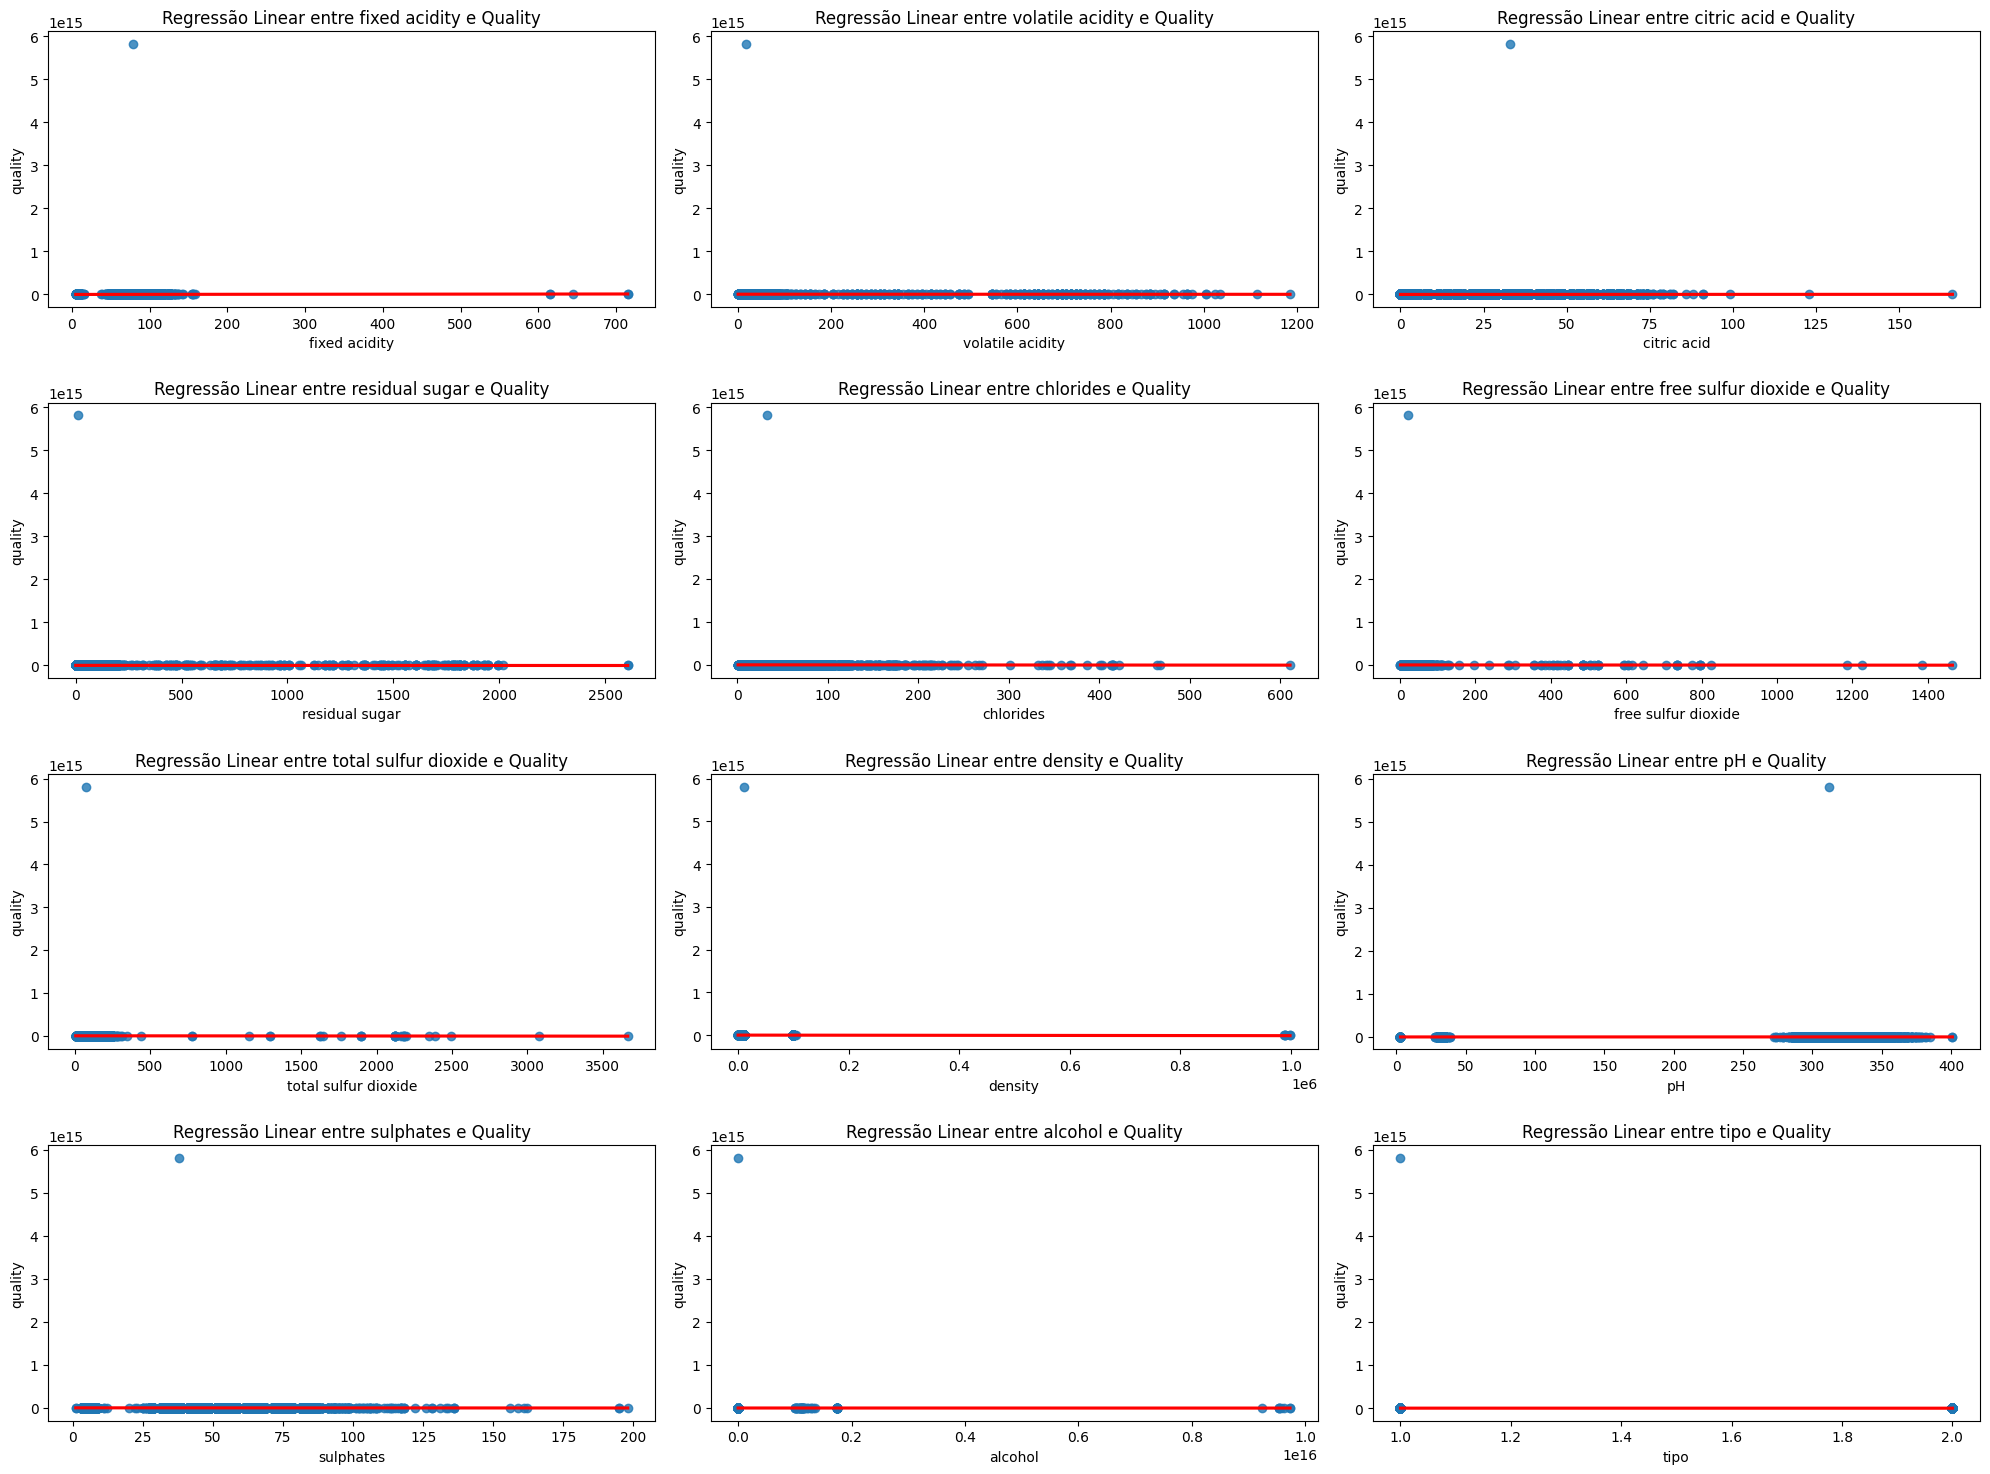

,Feature,Coefficient
0,fixed acidity,1.799473e+10
8,pH,2.455638e+09
2,citric acid,2.337875e+09
10,alcohol,3.421307e-05
7,density,-1.333639e+07
1,volatile acidity,-1.038909e+09
3,residual sugar,-1.410409e+09
5,free sulfur dioxide,-2.306199e+09
6,total sulfur dioxide,-3.478413e+09
4,chlorides,-5.921713e+09


In [30]:
from sklearn.linear_model import LinearRegression

# Criar um modelo de Regressão Linear para cada característica individual em relação à qualidade
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.regplot(x=col, y='quality', data=df, line_kws={"color": "red"})
    plt.title(f'Regressão Linear entre {col} e Quality')

plt.tight_layout()
plt.show()

# Treinando um modelo de Regressão Linear utilizando todas as características
X_all = df.drop('quality', axis=1)
y_all = df['quality']

linear_model = LinearRegression()
linear_model.fit(X_all, y_all)

# Exibindo os coeficientes de cada característica
coefficients = pd.DataFrame({
    'Feature': X_all.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Exibindo a tabela de coeficientes
coefficients


In [31]:
# Calculando assimetria (skewness) e curtose (kurtosis) para cada coluna
skewness = df.skew()
kurtosis = df.kurt()

# Criando um DataFrame para exibir os resultados
skewness_kurtosis_df = pd.DataFrame({
    'Feature': df.columns,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

# Exibindo o DataFrame
skewness_kurtosis_df


,Feature,Skewness,Kurtosis
fixed acidity,fixed acidity,6.184120,142.148952
volatile acidity,volatile acidity,4.870997,24.070150
citric acid,citric acid,0.251596,0.831527
residual sugar,residual sugar,5.965089,37.702139
chlorides,chlorides,4.167184,36.315594
free sulfur dioxide,free sulfur dioxide,12.723068,211.505842
total sulfur dioxide,total sulfur dioxide,13.039579,216.087909
density,density,5.036802,85.350205
pH,pH,-2.359777,3.846760
sulphates,sulphates,-0.017720,2.412496


VALIDAÇÃO CRUZADA:

1. Importação da Biblioteca de Validação Cruzada

2. Aplicando Validação Cruzada k-Folds

In [34]:
from sklearn.model_selection import cross_val_score

# Definindo k para a validação cruzada
k = 5

# Modelos treinados
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC()
}

# Loop para calcular a validação cruzada de cada modelo
for nome_modelo, modelo in modelos.items():
    scores = cross_val_score(modelo, X_all, y_all, cv=k, scoring='accuracy')
    print(f"{nome_modelo}: Acurácia Média de Validação Cruzada = {scores.mean():.4f} (Desvio Padrão = {scores.std():.4f})")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Regressão Logística: Acurácia Média de Validação Cruzada = 0.4364 (Desvio Padrão = 0.0003)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: Acurácia Média de Validação Cruzada = 0.4166 (Desvio Padrão = 0.0347)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM: Acurácia Média de Validação Cruzada = 0.4364 (Desvio Padrão = 0.0003)


Aplicar GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo os grids de hiperparâmetros para cada modelo
param_grid_logreg = {
    'C': [0.1, 1, 10, 100]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# Criando instâncias dos modelos
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
svm_model = SVC()

# Criando os objetos GridSearchCV para cada modelo
grid_search_logreg = GridSearchCV(log_reg, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

# Aplicando o GridSearchCV em cada modelo
grid_search_logreg.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados para cada modelo
print("Melhores parâmetros para Regressão Logística:", grid_search_logreg.best_params_)
print("Melhores parâmetros para Random Forest:", grid_search_rf.best_params_)
print("Melhores parâmetros para SVM:", grid_search_svm.best_params_)

# Treinando os modelos com os melhores parâmetros
melhor_logreg = grid_search_logreg.best_estimator_
melhor_rf = grid_search_rf.best_estimator_
melhor_svm = grid_search_svm.best_estimator_

# Avaliando os modelos otimizados
print("Acurácia da Regressão Logística Otimizada:", melhor_logreg.score(X_test, y_test))
print("Acurácia da Random Forest Otimizada:", melhor_rf.score(X_test, y_test))
print("Acurácia da SVM Otimizada:", melhor_svm.score(X_test, y_test))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Checklist Final de Melhoria
1 Análise de Balanceamento de Dados:

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


2 Avaliação com Curvas ROC-AUC:

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = melhor_rf.predict_proba(X_test)[:, 1]  # Para modelo binário
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Modelo Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


In [ ]:
import shap

# Calculando valores SHAP para o modelo Random Forest
explainer = shap.TreeExplainer(melhor_rf)
shap_values = explainer.shap_values(X_test)

# Plotando gráfico de importância
shap.summary_plot(shap_values, X_test)


1. Salvar o Modelo: lib jobli

In [ ]:
import joblib

# Supondo que o modelo 'rf' (Random Forest) tenha sido treinado e validado
# Salvar o modelo em um arquivo .pkl
joblib.dump(rf, 'random_forest_model.pkl')


In [ ]:
# Carregar o modelo salvo
modelo_carregado = joblib.load('random_forest_model.pkl')


In [ ]:
# Criar novos dados de exemplo
novos_dados = pd.DataFrame({
    'fixed acidity': [7.0],
    'volatile acidity': [0.27],
    'citric acid': [0.36],
    'residual sugar': [2.07],
    'chlorides': [0.045],
    'free sulfur dioxide': [45],
    'total sulfur dioxide': [170],
    'density': [1.001],
    'pH': [3.0],
    'sulphates': [0.45],
    'alcohol': [8.8],
    'tipo': [1]  # Adendo: 1 indica vinho branco, 2 indica vinho tinto
})

# Fazer previsão usando o modelo carregado
previsao = modelo_carregado.predict(novos_dados)
print("Nova previsão:", previsao)
